**IMPORTAÇÃO DAS BIBLIOTECAS**

In [64]:
##TRATAMENTO DOS DADOS
import pandas as pd
import re ##REGEX

##TRATAMENTO DE LINGUAGEM NATURAL
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

##VETORIZAR TEXTO
from sklearn.feature_extraction.text import CountVectorizer

#IMPORTAÇÃO DE MODELOS
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

#HOLDOUT
from sklearn.model_selection import train_test_split

##METRICAS DE AVALIAÇÃO
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

##TUNNING DE MODELO
from sklearn.grid_search import GridSearchCV

##GRAFICOS
from collections import Counter
import matplotlib.pyplot as plt

**IMPORTAÇÃO DOS DADOS**

In [4]:
##IMPORTAÇÃO DOS DADOS EXTRAIDOS DO TWEETER PREVIAMENTE
data = pd.read_csv("C:\Users\Adelino\Desktop\Roberth\Cursos\Nanodegree-Machine_Learning\Trabalhos\Projetos\ProjetoFinal\Saidas\Tratadas.csv", sep=';', encoding='utf-8')

In [5]:
##DIVISÃO DAS COLUNAS DE FEATURES E TARGET
features_columns = data.columns[0]
target_columns = data.columns[-1]

In [6]:
##CRIAÇÃO DOS DATAFRAMES COM AS FEATURES E COM O TARGET
X_raw = data[features_columns]
y_all = data[target_columns]

**AJUSTE BASE**

In [29]:
##CRIAÇÃO DE DATAFRAME VAZIO PARA TRATAMENTO DOS DADOS
X_all_DF = pd.DataFrame(columns=['TWEET'])

for linha in X_raw:  
    words = word_tokenize(linha) ##SEPARA POR PALAVRAS
    novalinha = ""
    flag = True
    for w in words:
        if w != "RT": ##NÃO UTILIZAR A PALAVRA RT, RETWEET
            if re.match('[a-zA-Z0-9_]',w) and flag: ##UTILIZAR APENAS PALAVRAS ALFANUMERICAS
                novalinha+=w+" " ##RECONSTREI A FRASE SEM RT, SEM @, SEM PONTUAÇÕES
            if w == "@": ##VERIFICAR SE É UM @, SE FOR MARCA PARA NÃO UTILIZAR A PROXIMA PALAVRA,
                            ##POIS TRATA-SE DE SITAÇÃO DE USUARIO 
                flag = False
            else:
                flag = True
    X_all_DF.loc[len(X_all_DF)] = novalinha,  ## INCLUI LINHA NOVA, TRATADA, NO DATAFRAME NOVO

X_all = X_all_DF['TWEET'] ##CRIA NOVO DATAFRAME PARA SER UTILIZADO COMO FEATURES

**CRIAÇÃO DE BAG OF WORDS, REMOVENDO STOP WORDS E REDUZINDO PARA O RADICAL (STEMMING)**

In [72]:
bitcoin_list = [u'https', u'bitcoin', u'btc', u'crypto', u'up', u'down']
stopWords = set(stopwords.words('english')) ## STOPWORDS DA BIBLIOTECA NLTK
ps = PorterStemmer() ##STEMMING DA BIBLIOTECA NLTK
vectorizer = CountVectorizer() ##INSTANCIA PARA VETORIZAR E CONTAR AS PALAVRAS EXISTENTES NO TWEET

X_all_bag_DF = pd.DataFrame(columns=['TWEET']) ## NOVO DATAFRAME PARA UTILIZAÇÃO DE BAG OF WORDS

positive_word_list =[]
negative_word_list =[]

for i, linha in enumerate(X_all):  
    words = word_tokenize(linha) ##SEPARA POR PALAVRAS 
    novalinha = ""
    for w in words:
        if w.strip() not in stopWords: ##VERIFICAR SE ESTA NA LISTA DE STOPWORDS, SE NÃO ESTIVER CONTINUA
            novalinha+=ps.stem(w.lower())+" " ##INCLUI O RADICAL DA PALAVRA EM UMA NOVA LINHA
            if(y_all[i] == 'POSITIVO'):
                positive_word_list.append(w.lower())
            else:
                if(y_all[i] == 'NEGATIVO'):
                    negative_word_list.append(w.lower())
    X_all_bag_DF.loc[len(X_all_bag_DF)] = novalinha ##INCLUI LINHA NO NOVO DATAFRAME

X_all_bag = X_all_bag_DF['TWEET'] ##CRIA NOVO DATAFRAME PARA SER UTILIZADO COMO FEATURES,
                                    ###JÁ EXCLUINDO STOPWORDS E REDUZINDO AS PALAVRAS PARA SEU RADICAL

positive_word_list = [word for word in positive_word_list if word not in bitcoin_list] ##LIMPA AS PALAVRAS PARA IR NO HISTOGRAMA
negative_word_list = [word for word in negative_word_list if word not in bitcoin_list] ##LIMPA AS PALAVRAS PARA IR NO HISTOGRAMA

In [9]:
##VETORIZAR E CONTAR AS PALAVRAS EXISTENTES NO TWEET E ARMAZENAR NA VARIAVEL X
X = vectorizer.fit_transform(X_all_bag).toarray()

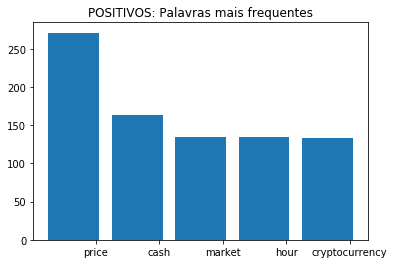

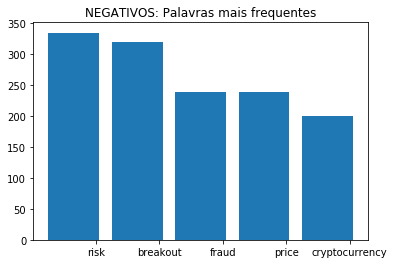

In [73]:
##GERA HISTOGRAMAS DE FREQUENCIA
##(https://stackoverflow.com/questions/35596128/how-to-generate-a-word-frequency-histogram-where-bars-are-ordered-according-to?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa)

##POSITIVOS
counts = dict(Counter(positive_word_list).most_common(5))

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.title("POSITIVOS: Palavras mais frequentes")
plt.show()

##NEGATIVOS
counts = dict(Counter(negative_word_list).most_common(5))

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.title("NEGATIVOS: Palavras mais frequentes")
plt.show()

**TREINAMENTO DE MODELOS**

In [12]:
##SEPARAR OS DADOS ENTRE TREINO E TESTE RESPEITANDO 75% DA BASE COMO TREINO
X_train, X_test, y_train, y_test = train_test_split(X, y_all, train_size=0.75)

#INSTANCIA DOS 3 MODELOS A SEREM TREINADOS E TESTADOS
mnb = MultinomialNB()
gnb = GaussianNB()
rfc = RandomForestClassifier()

C:\Users\Adelino\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
##TREINAMENTO DOS 3 MODELOS ACIMA, DE FORMA DEFAULT
mnb.fit(X_train, y_train)
gnb.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
##AVALIAÇÃO DOS F1_SCORE DE CADA MODELO
print "F1_Score Multinomial Naive Bayes: {}".format(f1_score(y_test, mnb.predict(X_test), average='micro'))
print "F1_Score Gaussian Naive Bayes: {}".format(f1_score(y_test, gnb.predict(X_test), average='micro'))
print "F1_Score Random Forest: {}".format(f1_score(y_test, rfc.predict(X_test), average='micro'))

F1_Score Multinomial Naive Bayes: 0.7688
F1_Score Gaussian Naive Bayes: 0.6808
F1_Score Random Forest: 0.836


**TUNNING DO MELHOR MODELO ACIMA**

In [12]:
##MELHOR F1_SCORE ACIMA = RANDOM FOREST
clf = RandomForestClassifier() #NOVA INSTANCIA DE RANDOM FOREST

##DEFINIÇÃO DOS PARAMENTROS A SEREM TESTADOS NO RANDOM FOREST
parameters = {'n_estimators' : [1, 10, 100],
               'criterion' : ['gini', 'entropy'],
               'max_depth' : [1, 10, 100],
               'min_samples_split' : [2, 5, 10],
               'min_samples_leaf' : [1, 5, 10]}

grid_obj = GridSearchCV(clf, parameters, cv=10)##CRIA OBJETO DE GRIDSEARCH COM O CLASSIFICADOR E 
                                                ##PARAMETROS ACIMA E CROSSVALIDATION DE 10 FOLDS
grid_obj = grid_obj.fit(X_train, y_train)##RODAR O GRIDSEARCH PARA IDENTIFICAR OS MELHORES PARAMETROS E
                                            ##TREINAR O MODELO COM ELES

clf = grid_obj.best_estimator_ ##CRIA NOVO CLASSIFICADOR COM O MELHOR RESULTADO DO GRIDSEARCH ACIMA

O parâmetro 'n_estimators' é 100 para o modelo ótimo.
O parâmetro 'max_depth' é 100 para o modelo ótimo.
O parâmetro 'min_samples_leaf' é 1 para o modelo ótimo.
 
O modelo calibrado tem F1 de 0.9368 no conjunto de treinamento.
O modelo calibrado tem F1 de 0.8584 no conjunto de teste.


In [16]:
##VERIFICAR QUAIS FORAM OS MELHORES VALORES DOS PARAMETROS
print "O parâmetro 'n_estimators' é {} para o modelo ótimo.".format(clf.get_params()['n_estimators'])
print "O parâmetro 'max_depth' é {} para o modelo ótimo.".format(clf.get_params()['max_depth'])
print "O parâmetro 'min_samples_leaf' é {} para o modelo ótimo.".format(clf.get_params()['min_samples_leaf'])
print "O parâmetro 'criterion' é {} para o modelo ótimo.".format(clf.get_params()['criterion'])
print "O parâmetro 'min_samples_split' é {} para o modelo ótimo.".format(clf.get_params()['min_samples_split'])

print " "

##VERIFICAR O F1_SCORE DO MODELO CALIBRADO COM O BEST ESTIMATOR DO GRIDSEARCH
print "O modelo calibrado tem F1 de {} no conjunto de treinamento.".format(f1_score(y_train, clf.predict(X_train), average='micro'))
print "O modelo calibrado tem F1 de {} no conjunto de teste.".format(f1_score(y_test, clf.predict(X_test), average='micro'))

O parâmetro 'n_estimators' é 100 para o modelo ótimo.
O parâmetro 'max_depth' é 100 para o modelo ótimo.
O parâmetro 'min_samples_leaf' é 1 para o modelo ótimo.
O parâmetro 'criterion' é gini para o modelo ótimo.
O parâmetro 'min_samples_split' é 5 para o modelo ótimo.
 
O modelo calibrado tem F1 de 0.9368 no conjunto de treinamento.
O modelo calibrado tem F1 de 0.8584 no conjunto de teste.


**CRIAR MODELO BENCHMARK**

In [13]:
##BENCHMARK CRIADO COM O DUMMY CLASSIFIER, QUE CLASSIFICA DE FORMA "BURRA OS TWEETS"
dmc = DummyClassifier()

In [14]:
dmc.fit(X_train, y_train) ##TREINA O BENCKMARK COM OS MESMOS DADOS PASSADOS PARA O MODELO
                            ##TREINADO E OTIMIZADO ACIMA

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [15]:
##VERIFICAR O F1_SCORE DO MODELO BENCHMARK
print "O modelo benchmark tem F1 de {} no conjunto de treinamento.".format(f1_score(y_train, dmc.predict(X_train), average='micro'))
print "O modelo benchmark tem F1 de {} no conjunto de teste.".format(f1_score(y_test, dmc.predict(X_test), average='micro'))

O modelo benchmark tem F1 de 0.3336 no conjunto de treinamento.
O modelo benchmark tem F1 de 0.3376 no conjunto de teste.
